In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# import statistical tools
from scipy import stats
# import data wrangle functions
import wrangle_austin_shelter as w

In [2]:
animals, train, validate, test = w.wrangle_austin_animal_shelter()

getting animal shelter data from local file


In [53]:
animals.head()

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome
0,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,2013-10-21 11:39:00,2013-09-21,Transfer,Intact Female,4 weeks,Partner,transfered
1,A665644,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,2013-10-21 11:39:00,2013-09-21,Transfer,Intact Female,4 weeks,Partner,transfered
2,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,*Alana,2013-12-20 17:36:00,2013-09-16,Adoption,Spayed Female,3 months,Foster,adopted
3,A665739,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,*Alana,2013-12-20 17:36:00,2013-09-16,Adoption,Spayed Female,3 months,Foster,adopted
4,A665763,2013-10-22 15:10:00,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,NaN,2013-10-26 18:32:00,2013-06-22,Adoption,Neutered Male,4 months,NaN,adopted


In [4]:
animals.shape

(192678, 18)

In [5]:
animals.columns

Index(['animal_id', 'datetime_in', 'found_location', 'intake_type',
       'intake_condition', 'animal_type', 'sex_upon_intake', 'age_upon_intake',
       'breed', 'color', 'name', 'datetime_out', 'date_of_birth',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome',
       'outcome_subtype', 'outcome'],
      dtype='object')

In [6]:
animals.datetime_in.min(), animals.datetime_in.max()

('2013-10-01 07:51:00', '2023-04-27 13:19:00')

In [7]:
animals.isna().sum()

animal_id                0
datetime_in              0
found_location           0
intake_type              0
intake_condition         0
animal_type              0
sex_upon_intake          0
age_upon_intake          0
breed                    0
color                    0
name                 44320
datetime_out             0
date_of_birth            0
outcome_type            38
sex_upon_outcome         0
age_upon_outcome        68
outcome_subtype     117209
outcome                  0
dtype: int64

In [8]:
animals[animals.sex_upon_intake.isna() == True]

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome


#### one of the na values of the sex_upon_intake is a Test, since there is only 1 other it won't make much difference to drop that row

In [9]:
animals = animals[animals.sex_upon_intake.isna() == False]

In [10]:
animals.isna().sum()

animal_id                0
datetime_in              0
found_location           0
intake_type              0
intake_condition         0
animal_type              0
sex_upon_intake          0
age_upon_intake          0
breed                    0
color                    0
name                 44320
datetime_out             0
date_of_birth            0
outcome_type            38
sex_upon_outcome         0
age_upon_outcome        68
outcome_subtype     117209
outcome                  0
dtype: int64

In [11]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47085
Return to Owner    40141
Euthanasia         10134
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
NaN                   38
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [12]:
animals[animals.outcome_type.isna() == True].sort_values('animal_id')

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome
55122,A671017,2014-01-17 12:46:00,10105 Falcon Ridge Dr. in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Fox Mix,Brown/Black,NaN,2014-01-20 08:27:00,2013-01-17,NaN,Unknown,1 year,NaN,unknown
55121,A671017,2014-01-17 12:46:00,10105 Falcon Ridge Dr. in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Fox Mix,Brown/Black,NaN,2014-01-20 08:27:00,2013-01-17,NaN,Unknown,1 year,NaN,unknown
146535,A674209,2014-03-09 16:38:00,4210 W. Braker in Austin (TX),Wildlife,Normal,Other,Unknown,0 years,Bat Mix,Brown,NaN,2014-03-09 18:15:00,2014-03-09,NaN,Unknown,0 years,NaN,unknown
146534,A674209,2014-03-09 16:38:00,4210 W. Braker in Austin (TX),Wildlife,Normal,Other,Unknown,0 years,Bat Mix,Brown,NaN,2014-03-09 18:15:00,2014-03-09,NaN,Unknown,0 years,NaN,unknown
178837,A679066,2014-05-16 10:58:00,Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Rabbit Sh,Brown,NaN,2014-05-16 00:00:00,2014-04-16,NaN,Unknown,4 weeks,NaN,unknown
67529,A686025,2014-08-15 18:48:00,12901 N Ih 35 #1100 in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,NaN,2014-08-16 08:35:00,2013-08-15,NaN,Unknown,1 year,NaN,unknown
57405,A700839,2015-04-20 12:45:00,Tracy Lynn Ln And Gardner Rd in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Pit Bull Mix,Blue,*Turkey,2021-01-12 18:07:00,2014-04-20,NaN,Neutered Male,6 years,NaN,unknown
57401,A700839,2015-10-17 10:16:00,2201 West William Connon in Austin (TX),Stray,Normal,Dog,Neutered Male,1 year,Pit Bull Mix,Blue,*Turkey,2021-01-12 18:07:00,2014-04-20,NaN,Neutered Male,6 years,NaN,unknown
8677,A719747,2016-01-26 18:09:00,Blue Goose Rd And Cameron in Austin (TX),Stray,Normal,Dog,Intact Female,3 months,American Pit Bull Terrier Mix,White/Brown,Layla,2021-02-13 10:58:00,2015-10-26,NaN,Spayed Female,5 years,NaN,unknown
8681,A719747,2021-02-12 21:51:00,12 Street And Brazos in Austin (TX),Stray,Normal,Dog,Spayed Female,5 years,American Pit Bull Terrier Mix,White/Brown,Layla,2021-02-13 10:58:00,2015-10-26,NaN,Spayed Female,5 years,NaN,unknown


In [13]:
train.intake_type.value_counts()

Stray                 69944
Owner Surrender       25712
Public Assist          8179
Wildlife               3239
Abandoned               653
Euthanasia Request      172
Name: intake_type, dtype: int64

In [14]:
animals[animals.intake_type == 'Wildlife']

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome
12,A666101,2013-10-26 18:33:00,Payne in Austin (TX),Wildlife,Injured,Other,Unknown,0 years,Squirrel Mix,Gray/Brown,NaN,2013-10-26 18:45:00,2013-10-26,Euthanasia,Unknown,0 years,NaN,death
13,A664830,2013-10-09 15:34:00,15043 Savannah Heights in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Brown/Black,NaN,2013-10-09 15:59:00,2012-10-09,Euthanasia,Unknown,1 year,Suffering,death
24,A665706,2013-10-21 18:06:00,43 Rainey St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,NaN,2013-10-21 18:50:00,2012-10-21,Disposal,Unknown,1 year,NaN,death
84,A665188,2013-10-14 22:25:00,2207 Pasadena Dr in Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Bat,Brown/Black,NaN,2013-10-15 08:16:00,2013-09-14,Euthanasia,Unknown,4 weeks,Rabies Risk,death
91,A664579,2013-10-05 14:55:00,8425 Adirondack Trail in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/White,NaN,2013-10-05 16:05:00,2011-10-05,Euthanasia,Unknown,2 years,Rabies Risk,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192491,A776787,2018-07-19 09:09:00,2300 Townes Ln in Austin (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Gray/Black,NaN,2018-07-19 10:05:00,2017-07-19,Euthanasia,Unknown,1 year,Suffering,death
192511,A753119,2017-07-02 07:40:00,13408 Fitzhugh Rd in Austin (TX),Wildlife,Sick,Other,Unknown,5 months,Raccoon,Brown,NaN,2017-07-03 09:07:00,2017-01-02,Euthanasia,Unknown,5 months,Rabies Risk,death
192559,A766079,2018-02-01 12:02:00,Willamette Dr in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/Gray,NaN,2018-02-01 13:46:00,2016-02-01,Euthanasia,Unknown,2 years,Medical,death
192575,A807634,2019-10-27 16:21:00,430 Ridgewood in Austin (TX),Wildlife,Injured,Other,Unknown,3 years,Bat,Brown,NaN,2019-10-28 07:49:00,2016-10-27,Disposal,Unknown,3 years,NaN,death


In [15]:
animals[animals.intake_type == 'Wildlife'].outcome_type.value_counts()

Euthanasia         5136
Disposal            453
Died                139
Transfer             71
Relocate             15
Adoption              8
Missing               2
Return to Owner       2
Name: outcome_type, dtype: int64

In [16]:
((72 + 14 + 7 + 4) / 5789) * 100

1.6755916393159442

#### Looks like things don't turn out very well for wildlife that gets sent to the animal shelter, only 1.68 % survive a trip to the animal shelter

In [17]:
animals.animal_type.value_counts()

Dog          120969
Cat           62771
Other          8123
Bird            786
Livestock        29
Name: animal_type, dtype: int64

In [18]:
animals[(animals.animal_type == 'Other') & (animals.intake_type != 'Wildlife')]

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome
328,A665986,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Male,1 year,Californian Mix,White/Black,Spaz,2013-10-30 16:31:00,2012-10-25,Transfer,Intact Male,1 year,Partner,transfered
480,A663373,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,Snowball,2013-10-23 17:02:00,2013-08-04,Transfer,Unknown,2 months,Partner,transfered
481,A663373,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,Snowball,2013-10-23 17:02:00,2013-08-04,Transfer,Unknown,2 months,Partner,transfered
522,A665985,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,Nina,2013-10-30 16:29:00,2012-10-25,Transfer,Intact Female,1 year,Partner,transfered
523,A665985,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,Nina,2013-10-30 16:29:00,2012-10-25,Transfer,Intact Female,1 year,Partner,transfered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192484,A813101,2020-02-04 11:47:00,Travis (TX),Owner Surrender,Normal,Other,Intact Male,5 years,Tortoise,Brown/Tan,Leonardo,2020-02-04 15:49:00,2015-02-04,Transfer,Intact Male,5 years,Partner,transfered
192509,A847452,2021-12-02 12:46:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 days,Guinea Pig,Tricolor,NaN,2021-12-09 17:57:00,2021-11-30,Transfer,Unknown,1 weeks,Partner,transfered
192551,A868861,2022-11-09 15:55:00,N Lamar Boulevard And Thurmond Street in Aust...,Stray,Sick,Other,Unknown,3 months,Guinea Pig,Tricolor/Black,A868861,2022-11-10 18:41:00,2022-08-09,Transfer,Unknown,3 months,Partner,transfered
192589,A820843,2020-07-30 13:07:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,1 year,Guinea Pig,Brown/White,*Wynken,2020-08-07 08:08:00,2019-07-30,Adoption,Unknown,1 year,Foster,adopted


In [19]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].outcome_type.value_counts()

Transfer           1037
Adoption            851
Euthanasia          326
Return to Owner      70
Died                 66
Disposal             58
Missing               4
Rto-Adopt             1
Relocate              1
Name: outcome_type, dtype: int64

In [20]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].breed.value_counts()

Guinea Pig         431
Rabbit Sh Mix      350
Rabbit Sh          239
Guinea Pig Mix     160
Bat Mix            142
                  ... 
Hermit Crab Mix      1
Rex/Lop-English      1
American Sable       1
Polish Mix           1
Chinchilla-Amer      1
Name: breed, Length: 118, dtype: int64

In [21]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47085
Return to Owner    40141
Euthanasia         10134
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
NaN                   38
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [22]:
animals.animal_type.value_counts()

Dog          120969
Cat           62771
Other          8123
Bird            786
Livestock        29
Name: animal_type, dtype: int64

In [23]:
dogs = animals[animals.animal_type == 'Dog']
cats = animals[animals.animal_type == 'Cat']
others = animals[animals.animal_type == 'Other']
birds = animals[animals.animal_type == 'Bird']
livestock = animals[animals.animal_type == 'Livestock']

In [24]:
dogs.outcome_type.value_counts()

Adoption           58120
Return to Owner    36789
Transfer           21582
Euthanasia          2300
Rto-Adopt           1637
Died                 366
Disposal              72
Missing               67
Stolen                10
Name: outcome_type, dtype: int64

In [25]:
dogs.intake_type.value_counts()

Stray                 77469
Owner Surrender       30231
Public Assist         12393
Abandoned               668
Euthanasia Request      208
Name: intake_type, dtype: int64

In [26]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91097
Transfer           47085
Return to Owner    40141
Euthanasia         10134
Rto-Adopt           1887
Died                1439
Disposal             701
Missing              120
NaN                   38
Relocate              26
Stolen                10
Name: outcome_type, dtype: int64

In [27]:
animals[animals.outcome_type == 'Adoption'].outcome_subtype.value_counts()

Foster     16202
Offsite      603
Barn           2
Name: outcome_subtype, dtype: int64

In [28]:
# added this to the preparation step

# animals['outcome'] = np.where(animals.outcome_type == 'Adoption', 'adopted',
#                           np.where(animals.outcome_type == 'Return to Owner', 'returned',
#                           np.where(animals.outcome_type == 'Transfer', 'transfered',
#                           np.where(animals.outcome_type == 'Euthanasia', 'death',
#                           np.where(animals.outcome_type == 'Rto-Adopt', 'returned',
#                           np.where(animals.outcome_type == 'Died', 'death',
#                           np.where(animals.outcome_type == 'Disposal', 'death',
#                           np.where(animals.outcome_type == 'Missing', 'unknown',
#                           np.where(animals.outcome_type == 'Stolen', 'unknown',
#                           np.where(animals.outcome_type == 'Relocate', 'transfered',
#                           np.where(animals.outcome_type.isnull() == True, 'unknown', ''
#                                   )))))))))))

In [29]:
animals[animals.outcome == '']

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome


<AxesSubplot:>

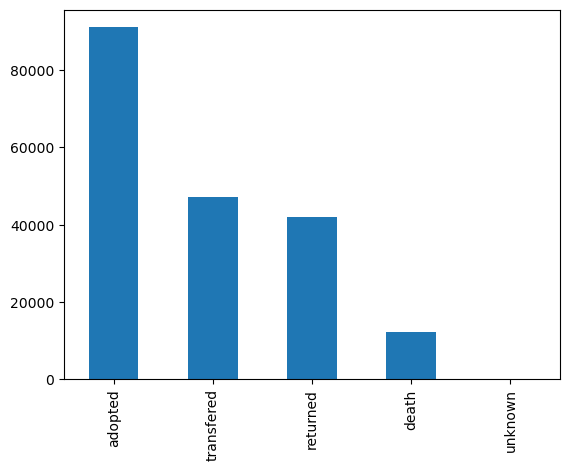

In [30]:
animals.outcome.value_counts().plot.bar()

In [31]:
deaths = animals[animals.outcome == 'death']

In [32]:
deaths = deaths.set_index('datetime_out')

In [33]:
deaths[deaths.intake_type != 'Wildlife'].intake_condition.value_counts()

Normal        3264
Injured       1853
Sick          1088
Nursing        165
Aged            79
Other           30
Neonatal        17
Medical         16
Behavior        12
Feral            9
Pregnant         7
Med Urgent       3
Med Attn         2
Agonal           1
Name: intake_condition, dtype: int64

In [34]:
deaths[deaths.intake_type == 'Wildlife'].intake_condition.value_counts()

Normal      2984
Sick        1646
Injured     1030
Nursing       51
Neonatal      10
Medical        3
Other          2
Feral          1
Unknown        1
Name: intake_condition, dtype: int64

In [35]:
deaths

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome
datetime_out,,,,,,,,,,,,,,,,,
2013-10-26 18:45:00,A666101,2013-10-26 18:33:00,Payne in Austin (TX),Wildlife,Injured,Other,Unknown,0 years,Squirrel Mix,Gray/Brown,NaN,2013-10-26,Euthanasia,Unknown,0 years,NaN,death
2013-10-09 15:59:00,A664830,2013-10-09 15:34:00,15043 Savannah Heights in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Brown/Black,NaN,2012-10-09,Euthanasia,Unknown,1 year,Suffering,death
2013-10-21 18:50:00,A665706,2013-10-21 18:06:00,43 Rainey St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,NaN,2012-10-21,Disposal,Unknown,1 year,NaN,death
2013-10-18 12:13:00,A656761,2013-10-02 15:02:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,7 years,Pit Bull Mix,Fawn,Gotti,2006-06-18,Euthanasia,Intact Male,7 years,Court/Investigation,death
2013-10-15 08:16:00,A665188,2013-10-14 22:25:00,2207 Pasadena Dr in Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Bat,Brown/Black,NaN,2013-09-14,Euthanasia,Unknown,4 weeks,Rabies Risk,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 13:03:00,A848660,2022-04-29 16:23:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,3 years,Australian Cattle Dog Mix,Brown/White,Capo,2018-12-26,Euthanasia,Intact Male,3 years,Aggressive,death
2018-02-01 13:46:00,A766079,2018-02-01 12:02:00,Willamette Dr in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/Gray,NaN,2016-02-01,Euthanasia,Unknown,2 years,Medical,death
2019-10-28 07:49:00,A807634,2019-10-27 16:21:00,430 Ridgewood in Austin (TX),Wildlife,Injured,Other,Unknown,3 years,Bat,Brown,NaN,2016-10-27,Disposal,Unknown,3 years,NaN,death


In [36]:
deaths.resample('Y').animal_id.count().plot()
plt.title('Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Animal Deaths in Shelter')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [38]:
lil_bit = animals[animals.animal_id == 'A721033']

In [39]:
lil_bit

,animal_id,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name,datetime_out,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,outcome_subtype,outcome
11057,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2019-08-10 11:56:00,2015-05-20,Return to Owner,Neutered Male,4 years,NaN,returned
11058,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2017-01-10 16:20:00,2015-05-20,Return to Owner,Neutered Male,1 year,NaN,returned
11059,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2016-10-21 18:55:00,2015-05-20,Return to Owner,Neutered Male,1 year,NaN,returned
11060,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2019-03-11 16:27:00,2015-05-20,Return to Owner,Neutered Male,3 years,NaN,returned
11061,A721033,2019-02-24 21:53:00,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2019-05-21 14:42:00,2015-05-20,Return to Owner,Neutered Male,4 years,NaN,returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2016-12-16 11:32:00,2015-05-20,Return to Owner,Neutered Male,1 year,NaN,returned
12173,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2016-09-12 13:40:00,2015-05-20,Return to Owner,Neutered Male,1 year,NaN,returned
12174,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2018-03-08 15:04:00,2015-05-20,Return to Owner,Neutered Male,2 years,NaN,returned
12175,A721033,2018-08-18 21:45:00,1500 Red River Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle,Lil Bit,2019-02-12 15:20:00,2015-05-20,Return to Owner,Neutered Male,3 years,NaN,returned


In [44]:
lil_bit.groupby('datetime_in').datetime_out.count()

datetime_in
2016-02-20 10:44:00    32
2016-07-10 11:53:00    32
2016-09-03 14:30:00    32
2016-10-20 22:47:00    32
2016-12-15 10:07:00    32
2017-01-09 14:26:00    32
2017-01-26 06:55:00    32
2017-01-30 23:05:00    64
2017-02-06 10:13:00    32
2018-03-07 08:27:00    32
2018-03-14 10:57:00    32
2018-04-05 17:59:00    32
2018-04-12 10:14:00    64
2018-05-22 13:48:00    32
2018-08-06 19:00:00    64
2018-08-18 21:45:00    32
2018-09-21 15:01:00    32
2018-09-24 19:44:00    32
2018-11-19 19:53:00    32
2018-12-17 16:52:00    64
2019-02-12 10:21:00    64
2019-02-16 10:30:00    32
2019-02-24 21:53:00    32
2019-03-07 12:02:00    32
2019-04-26 10:28:00    64
2019-08-05 10:52:00    32
2019-09-16 14:06:00    64
2019-10-05 12:31:00    32
Name: datetime_out, dtype: int64

In [52]:
c = train.corrplot()

AttributeError: 'DataFrame' object has no attribute 'corrplot'

In [51]:
plt.heatmap(c)

AttributeError: module 'matplotlib.pyplot' has no attribute 'heatmap'